<a href="https://colab.research.google.com/github/18520395/CS232.K21/blob/master/phanloairan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Input: Ảnh một con rắn

Output: Độc hay không độc

Dataset: Xây dựng từ hai nguồn

https://www.kaggle.com/sameeharahman/preprocessed-snake-images/data#

Bao gồm 5 loài rắn trong đó 4 loài từ class 1 đến 4 không độc, chỉ sử dụng class 4 và 5 để cân bằng dữ liệu

https://github.com/arjun921/Indian-Snakes-Dataset

Bao gồm các hình ảnh rắn độc và không độc được tìm thấy ở tiểu lục địa Ấn Độ (các hình ảnh được download từ google)



Mô hình sử dụng:
- SVM
- Logistic Regression
 

In [ ]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#load data
!unzip /content/drive/'My Drive'/'hk2 2019-2020'/'machine learning'/'venomous snake classification'/snake.zip

Streaming output truncated to the last 5000 lines.
  inflating: snake/non-venomous/Indian-Rock-Python-Langur-kill-2.jpg  
  inflating: snake/non-venomous/Indian-Rock-Python-Langur-kill-3.jpg  
  inflating: snake/non-venomous/Indian-Rock-Python-Langur-kill-4.jpg  
  inflating: snake/non-venomous/Indian-Rock-Python-Langur-kill-5.jpg  
  inflating: snake/non-venomous/indian-rock-python-on-the-road--nagarhole.jpg  
  inflating: snake/non-venomous/indian-rock-python-or-indian-python-python-molurus-in-ranthambhore-FXYGTF.jpg  
  inflating: snake/non-venomous/indian-rock-python-python-molurus-aarey-milk-colony-india-J21E53.jpg  
  inflating: snake/non-venomous/indian-rock-python-python-molurus-aarey-milk-colony-india-j21e53_001.jpg  
  inflating: snake/non-venomous/indian-rock-python-python-molurus-aka-indian-python-rock-python-black-F2JD6R.jpg  
  inflating: snake/non-venomous/indian-rock-python-python-molurus-barnawapara-wls-chhattisgarh-hnwtn1.jpg  
  inflating: snake/non-venomous/indian-r

In [ ]:
#import libraries
from sklearn.linear_model import LogisticRegression
from imutils import paths
from keras.applications import VGG16
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
import random
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.externals import joblib
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
!mv "/content/snake" "/content/drive/My Drive/hk2 2019-2020/machine learning/venomous snake classification/data"

Lấy đường dẫn của ảnh

Đảo vị trí các đường dẫn



In [ ]:
#image path
image_path = list(paths.list_images('/content/drive/My Drive/hk2 2019-2020/machine learning/venomous snake classification/data/snake'))

random.shuffle(image_path)

Gắn nhãn các ảnh từ đường dẫn theo tên file (độc hoặc không độc)

Số hóa nhãn dữ liệuliệu

In [ ]:
#label images
labels = [p.split(os.path.sep)[-2] for p in image_path]

#changing snake type to digit
le = LabelEncoder()
labels = le.fit_transform(labels)

In [ ]:
#load ImageNet's VGG 16 model without Fully connected Layer
model = VGG16(weights='imagenet', include_top=False)

In [ ]:
#resize images to (224,224)
list_image = []
for (j, imagePath) in enumerate(image_path):
    image = load_img(imagePath, target_size=(224, 224))
    image = img_to_array(image)
    
    image = np.expand_dims(image, 0)
    image = imagenet_utils.preprocess_input(image)
    
    list_image.append(image)
  
list_image = np.vstack(list_image)

In [ ]:
#featuring 
features = model.predict(list_image)

#3 dims tensor ConvNet -> 1 dim vector
features = features.reshape((features.shape[0], 512*7*7))

In [ ]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.15, random_state=42)

In [ ]:
#train with svm
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#valuation
y_pred = svm_linear.predict(X_test)
accuracy_score(y_pred,y_test)

0.8402100525131283

In [ ]:
#train with Logistic Regression
reg = LogisticRegression()
reg.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#valuation
y_pred = reg.predict(X_test)
accuracy_score(y_pred,y_test)

0.8612153038259565

In [ ]:
#save model
joblib.dump(svm_linear, '/content/drive/My Drive/hk2 2019-2020/machine learning/venomous snake classification/model/svm_linear1.pkl')
joblib.dump(reg, '/content/drive/My Drive/hk2 2019-2020/machine learning/venomous snake classification/model/logistic_regression1.pkl')

['/content/drive/My Drive/hk2 2019-2020/machine learning/venomous snake classification/model/logistic_regression1.pkl']

In [ ]:
#load model
svm_linear=joblib.load('/content/drive/My Drive/hk2 2019-2020/machine learning/venomous snake classification/model/svm_linear1.pkl')
logistic_regression =joblib.load('/content/drive/My Drive/hk2 2019-2020/machine learning/venomous snake classification/model/logistic_regression1.pkl')

Saving ran-cap-nong.jpg.webp to ran-cap-nong.jpg.webp


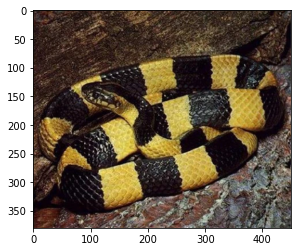

SVM result: 
=========================nonvenomous=========================
Logistic Regression result: 
=========================nonvenomous=========================


In [ ]:
#test model
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn 
  image = load_img(path, target_size=(224, 224))
  image = img_to_array(image)
    
  image = np.expand_dims(image, 0)
  image = imagenet_utils.preprocess_input(image)
    
  image = np.vstack([image])

  features = model.predict(image)
  features = features.reshape((features.shape[0], 512*7*7))

output = load_img('/content/' + fn)  
plt.imshow(output)
plt.show()

v = svm_linear.predict(features)
v1 = logistic_regression.predict(features)

print("SVM result: ")
if v[0] == 0:
  print("=========================nonvenomous=========================")
if v[0] == 1:
  print("=========================venomous=========================")

print("Logistic Regression result: ")
if v1[0] == 0:
  print("=========================nonvenomous=========================")
if v1[0] == 1:
  print("=========================venomous=========================")

Code tham khảo từ: https://nttuan8.com/bai-9-transfer-learning-va-data-augmentation/
